Input: 
- road segments (to be decided how big, probably multiple bridges per segments)
- Traffic density per type of transport (3, decided in Simio) per segment
- Broken bridges per segment
- Average travel time in segment per type of transport

Output:
- stacked graph of traffic density
- heatmap of traffic density --> perhaps better to take average travel time??
- broken bridges per segment (include type only in table, not graph)

<IPython.core.display.Javascript object>


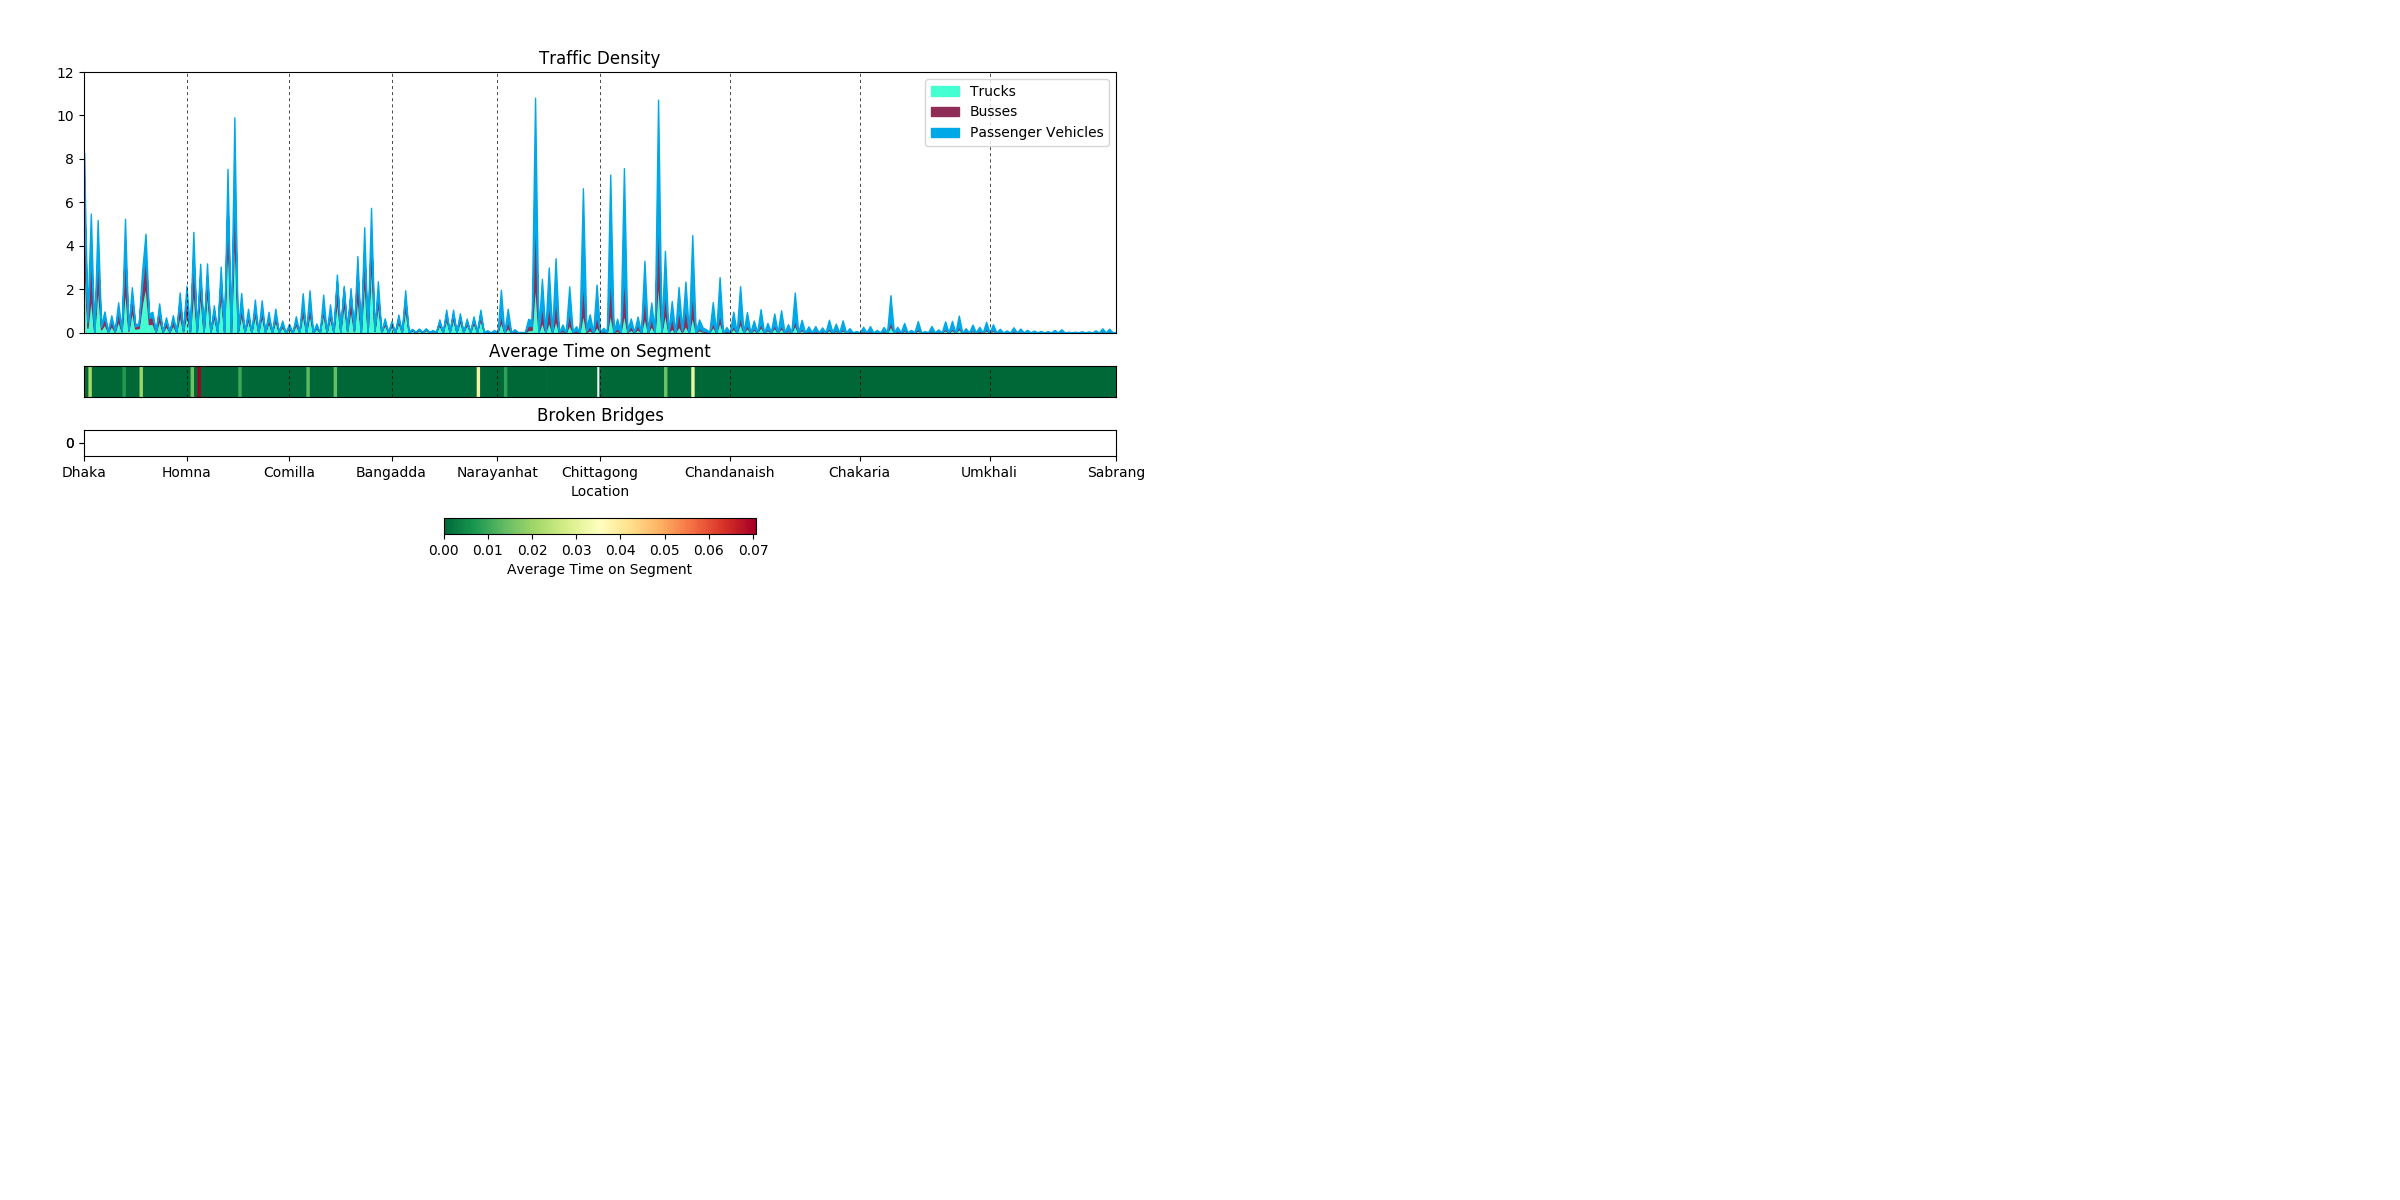

NameError: name 'waiting_time' is not defined

In [1]:
# import packages
from Visualisation import plot_traffic_density
from MySQL import Database
import time
import warnings
import matplotlib.pyplot as plt

%matplotlib notebook

# Depending on the choices made by the user, select the right csv file and data
db = Database('127.0.0.1', 'Discrete', 'epa1351user', 'qwertyu1234')
db.connect()

fig = plt.figure(figsize=(12, 6))

previous_time = -1
latest_time = -1

while True:
    latest_time = db.latestTime()
    
    if latest_time > previous_time:
        previous_time = latest_time
    
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            plot_traffic_density(fig, db.dataPerSegment(previous_time))
            fig.canvas.draw()
    
    time.sleep(waiting_time)

db.disconnect()